# 데이터 로드하기

보스턴 주택 가격 데이터셋을 사용

train data : 404개

test data : 102개

feature : 13 개

\* feature마다 scale이 다름 \*

In [1]:
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 3us/step


In [2]:
print("train data shape:",train_data.shape)
print("train targets shape",train_targets.shape)

train data shape: (404, 13)
train targets shape (404,)


In [3]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

# 데이터 전처리하기

## Scale 맞추기
feature별로 scale 다름 => __feature별로 정규화(normalization)__

- 정규화 공식 : (val-평균)/표준편차

In [5]:
# 행 기준
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)

print("feature별 평균 벡터 길이:",len(mean))
print("feature별 표준편차 벡터 길이:",len(std))

# 한번에 하는 것보다 이게 빠른가?
train_data-=mean
train_data/=std

feature별 평균 벡터 길이: 13
feature별 표준편차 벡터 길이: 13


## test data scale 맞추기

train data의 평균과 표준 편차를 이용해야한다

절대 test data의 정보를 이용하면 안된다!

In [0]:
test_data-=mean
test_data/=std

# 모델 구성

## 함수 build_model() 정의 :

동일한 모델을 여러번 생성할 것이므로 함수로 정의한다

In [0]:
from keras import models
from keras import layers

def build_model():
    
    model=models.Sequential()
    
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    
    return model

# 훈련,검증 하기

## k-fold cross-validation 

train data 많지 않으므로 k-fold cross-validation 이용

데이터를 k개로 분할하고

k개의 모델을 각각 만들어 k-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법

모델의 검증 점수는 k개의 검증 점수의 평균이다

In [8]:
import numpy as np

# 보통 4,5
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]

for i in range(k):
    
    print("처리중인 폴드 #",i,end=' ')
    
    # validation data
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # train data
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    
    print("학습 시작....",end=' ')
    # 모델 학습
    model=build_model()
    # verbose=0 이면 훈련과정 출력되지 않는다
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
    print("학습 끝!")
    
    # 모델 평가
    val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)
    

처리중인 폴드 # 0 학습 시작.... WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
학습 끝!
처리중인 폴드 # 1 학습 시작.... 학습 끝!
처리중인 폴드 # 2 학습 시작.... 학습 끝!
처리중인 폴드 # 3 학습 시작.... 학습 끝!


In [9]:
np.mean(all_scores)

2.386025152879186

epochs=500 일 때,

In [10]:
import numpy as np

# 보통 4,5
k=4
num_val_samples=len(train_data)//k
num_epochs=500
all_mae_histories=[]

for i in range(k):
    
    print("처리중인 폴드 #",i,end=' ')
    
    # validation data
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # train data
    partial_train_data=np.concatenate([train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    
    print("학습 시작....",end=' ')
    # 모델 학습
    model=build_model()
    # verbose=0 이면 훈련과정 출력되지 않는다
    history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=1,verbose=0)
    print("학습 끝!")
    
    # 모델 평가
    mae_history=history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

처리중인 폴드 # 0 학습 시작.... 학습 끝!
처리중인 폴드 # 1 학습 시작.... 학습 끝!
처리중인 폴드 # 2 학습 시작.... 학습 끝!
처리중인 폴드 # 3 학습 시작.... 학습 끝!


결과 MAE 그래프로 그리기

In [0]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

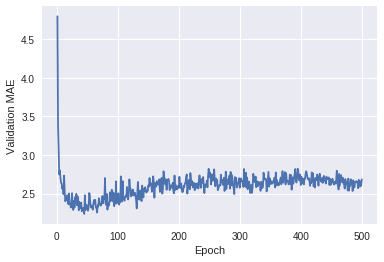

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')

plt.show()

그래프 알아보기 쉽게 그리기

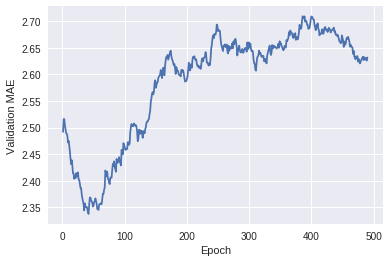

In [15]:
def smooth_curve(points,factor=0.9):
  smoothed_points=[]
  
  for point in points:
    if smoothed_points:
      previous=smoothed_points[-1]
      smoothed_points.append(previous*factor+point*(1-factor))
    else:
      smoothed_points.append(point)
      
  return smoothed_points


smooth_mae_history=smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epoch')
plt.ylabel('Validation MAE')

plt.show()

위 그래프 보면 MAE 80번쨰 이후로 줄어드는것이 멈춤

=> epoch 80으로 모델 다시 빌드

In [16]:
model=build_model()
model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
_,test_mae=model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 1ms/step


In [18]:
test_mae

2.6750134393280627